In [1]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import argparse
import scipy.stats
import pingouin
import pandas as pd

os.environ["CUDA_VISIBLE_DEVICES"] = '0' #use this GPU
warnings.filterwarnings("ignore")

observed [ 565.95744681 6878.08510638  572.87234043  851.87234043  489.40425532]
predicted [ 877.82978723 5818.0212766  1010.9787234  1208.12765957  443.23404255]
sample size 9358.191489361701


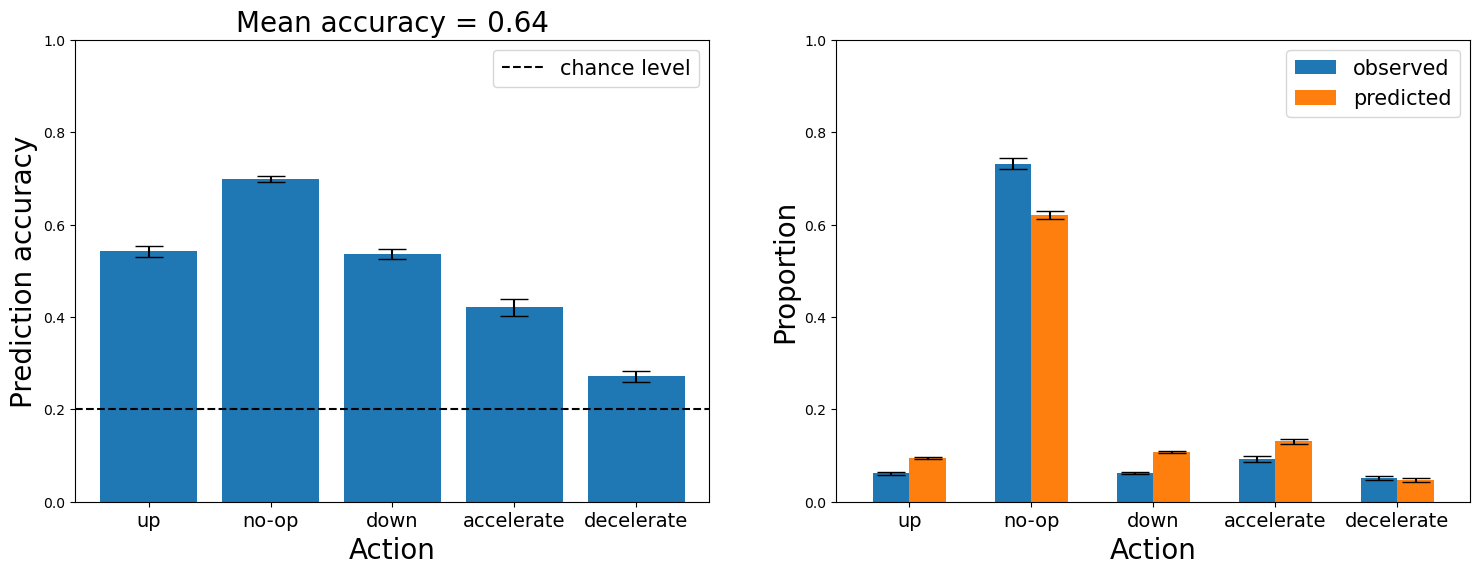

In [3]:
pred_match_list = np.load('data_npy/pred_fit.npy')

num_action = 5
num_sub = 47

mean_pred = np.mean(pred_match_list,axis=1)
ste_pred = np.std(pred_match_list,axis=1)/np.sqrt(num_sub)

freq_list = pred_match_list[1:,:,1]
total_freq = np.sum(freq_list,axis=0)
prop_list = pred_match_list[1:,:,1:]/total_freq[None,:,None]

mean_prop = np.mean(prop_list,axis=1)
ste_prop = np.std(prop_list,axis=1)/np.sqrt(num_sub)

threshold = 0.2
bar_width = 0.3
x = np.arange(num_action)

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.bar(range(num_action),mean_pred[1:,0],yerr=ste_pred[1:,0],capsize=10)
plt.xlabel('Action',fontsize = 20)
plt.ylabel('Prediction accuracy',fontsize = 20)
plt.plot([-0.6,4.6],[0.2,0.2], "k--")
plt.xlim([-0.6,4.6])
plt.ylim([0,1])
plt.legend(['chance level'],fontsize = 15)
plt.title('Mean accuracy = '+str(round(mean_pred[0,0],2)),fontsize = 20)
plt.xticks(x,['up','no-op','down','accelerate','decelerate'],fontsize = 14)

plt.subplot(1,2,2)
plt.bar(x-bar_width/2,mean_prop[:,0],yerr=ste_prop[:,0],capsize=10,width = bar_width)
plt.bar(x+bar_width/2,mean_prop[:,1],yerr=ste_prop[:,1],capsize=10,width = bar_width)
plt.xlabel('Action',fontsize = 20)
plt.ylabel('Proportion',fontsize = 20)
plt.xlim([-0.6,4.6])
plt.ylim([0,1])
plt.legend(['observed','predicted'],fontsize = 15)
plt.xticks(x,['up','no-op','down','accelerate','decelerate'],fontsize = 14)

# plt.subplot(1,2,2)
# plt.bar(x-bar_width/2,mean_pred[1:,1],yerr=ste_pred[1:,1]*np.sqrt(num_sub),capsize=10,width = bar_width)
# plt.bar(x+bar_width/2,mean_pred[1:,2],yerr=ste_pred[1:,2]*np.sqrt(num_sub),capsize=10,width = bar_width)
# plt.xlabel('Action',fontsize = 20)
# plt.ylabel('Action frequencies',fontsize = 20)
# plt.xlim([-0.6,4.6])
# plt.legend(['observed','predicted'],fontsize = 15)
# plt.xticks(x,['up','no-op','down','accelerate','decelerate'],fontsize = 14)

print("observed",mean_pred[1:,1])
print("predicted",mean_pred[1:,2])
print("sample size",np.sum(mean_pred[1:,1]))